     가맹점블록코드(BLCK_CD) 내국인업종코드(SB_UPJONG_CD)  기준년월(TS_YM)  일별(TS_YMD) 요일(DAW)  \
355            212968                 SB001       201908    20190808     월요일   
279            212396                 SB016       202003    20200327     월요일   
274            415443                 SB008       201905    20190513     월요일   
59              19237                 SB053       202001    20200123     월요일   
402            219279                 SB051       201805    20180513     월요일   
..                ...                   ...          ...         ...     ...   
349            227268                 SB016       202007    20200704     일요일   
236            231096                 SB001       201811    20181109     일요일   
465            219773                 SB021       201808    20180804     일요일   
233             24336                 SB054       201708    20170810     일요일   
30             282426                 SB020       201702    20170220     일요일   

     시간대(TM)  카드이용금액계(AMT_CORR)  카드이용건수

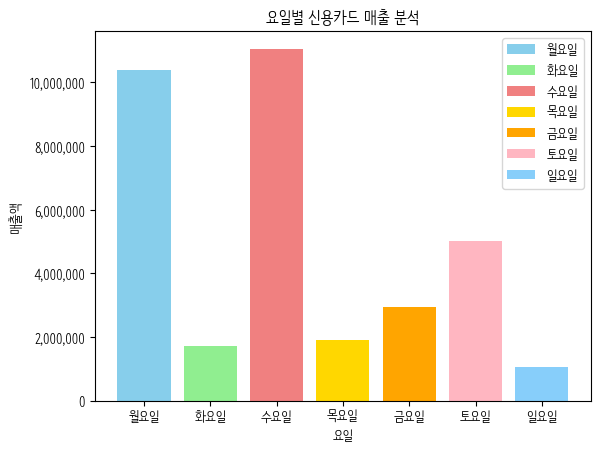

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

# 나눔바른펜 폰트 경로 설정 (예시, 실제 경로로 수정)
font_location = r"C:\Windows\Fonts\NanumBarunpenR.ttf"

# 폰트 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

# Excel 파일에서 데이터 읽기
excel_file_path = r"C:\Users\hyoun\Downloads\내국인(블록) 일자별시간대별.xlsx"  # 실제 파일 경로 및 이름으로 변경
df = pd.read_excel(excel_file_path)

# 요일을 정렬 (월요일부터 일요일까지)
days_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df['요일(DAW)'] = pd.Categorical(df['요일(DAW)'], categories=days_order, ordered=True)
df = df.sort_values('요일(DAW)')

# 데이터 확인
print(df)

# 막대형 차트 생성
colors = {'월요일': 'skyblue', '화요일': 'lightgreen', '수요일': 'lightcoral', '목요일': 'gold', 
          '금요일': 'orange', '토요일': 'lightpink', '일요일': 'lightskyblue'}

fig, ax = plt.subplots()

for day, color in colors.items():
    day_data = df[df['요일(DAW)'] == day]
    ax.bar(day_data['요일(DAW)'], day_data['카드이용금액계(AMT_CORR)'], color=color, label=day)

# 차트 제목 및 레이블 추가
plt.title('요일별 신용카드 매출 분석')
plt.xlabel('요일')
plt.ylabel('매출액')

# 범례 추가
ax.legend()

# y 축 포맷팅 함수 정의 (금액 형식으로 변환)
def format_currency(value, tick_number):
    return '{:,.0f}'.format(value)

# y 축 포맷팅 함수 적용
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))

# 차트 표시
plt.show()